In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os, time
from tqdm import tqdm
import numpy as np, pandas as pd
import cv2
from tqdm import tqdm_notebook, tqdm # Iteration visualization
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split

In [2]:
def from_yolo_to_cor(box, img_h, img_w):
    x1, y1 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
    x2, y2 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
    return x1, y1, x2, y2


def draw_boxes(path, boxes, original=False):
    img = cv2.imread(path)
    plt.figure(figsize=(12, 6))
    for box in boxes:
        if box[0] == 0:
            text = 'Upper Cloth'
        elif box[0] == 1:
            text = 'Lower Cloth'
        else:
            text = 'Full body'
        x1, y1, x2, y2 = from_yolo_to_cor(box[1:], img.shape[0], img.shape[1])
        color_ = (255*box[0], 120, 255*max(box[0]-1, 0))
        img = cv2.rectangle(img, (x1, y1), (x2, y2),color_, 7)
        y1 = int(y1*0.97)
        img =  cv2.putText(img, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (255, 0, 0), 2);
    plt.figure(figsize=(20, 8)), plt.imshow(img);
    return img

<Figure size 864x432 with 0 Axes>

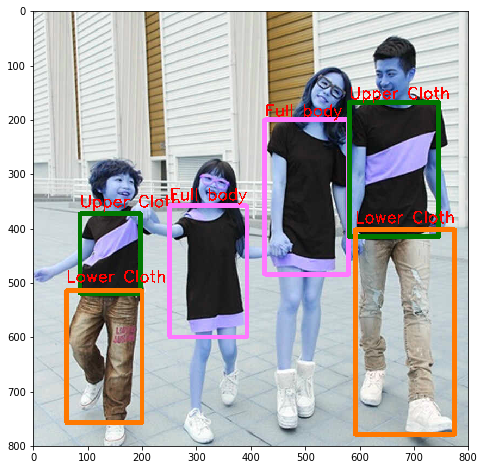

In [3]:
path = 'data/image1.jpg'
img = draw_boxes(path, [[0, 0.1775, 0.556875, 0.1375, 0.18375],
                 [1, 0.163125, 0.794375, 0.17375, 0.30375],
                 [2, 0.4025, 0.598125, 0.1775, 0.30125],
                 [2, 0.62875, 0.4275, 0.1925, 0.3575],
                 [0, 0.829375, 0.36375, 0.20625, 0.31],
                 [1, 0.854375, 0.7375, 0.22875, 0.47]]);
cv2.imwrite('output1.jpg', img);

<Figure size 864x432 with 0 Axes>

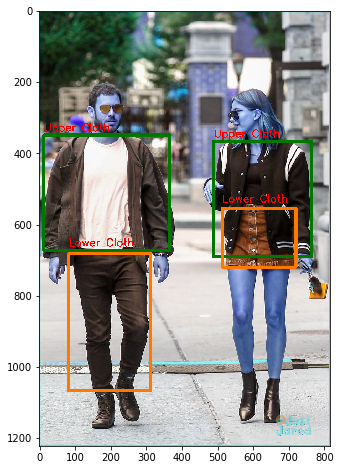

In [5]:
path = 'data/image2.jpg'
img = draw_boxes(path, [[0, 0.2331701346389229, 0.4177577741407529, 0.4320685434516524, 0.26595744680851063],
                        [1, 0.2423500611995104, 0.7152209492635024, 0.28151774785801714, 0.3142389525368249],
                        [0, 0.7674418604651163, 0.4320785597381342, 0.3353733170134639, 0.265139116202946],
                        [1, 0.7558139534883721, 0.5208674304418985, 0.2533659730722154, 0.13502454991816695]]);
cv2.imwrite('data/image2_labels.jpg', img);

<Figure size 864x432 with 0 Axes>

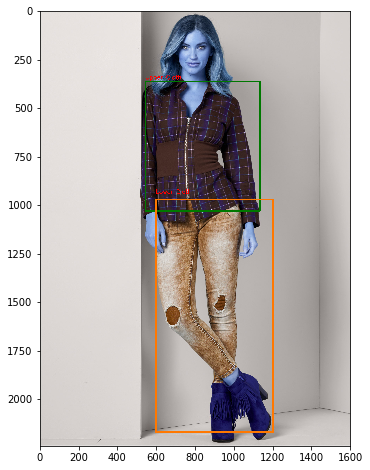

In [9]:
path = 'data/venus/women/tops/long_sleeve/final_images/images/zip_up_plaid_top_idx3.jpg'
img = draw_boxes(path, [[0, 0.523110555902561, 0.3104910714285714, 0.36914428482198625, 0.296875],
                        [1, 0.5605871330418488, 0.7006696428571428, 0.37663960024984383, 0.534375]]);
cv2.imwrite('data/image3_labels.jpg', img);

In [19]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

In [29]:
#path = 'data/image2.jpg'
path = 'data/venus/women/tops/long_sleeve/final_images/images/zip_up_plaid_top_idx3.jpg'

NUM_CLUSTERS = 6

print('reading image')
im = Image.open(path)
im = im.resize((600, 600))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

# bonus: save image using only the N most common colours
import imageio
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==i)],:] = code
imageio.imwrite(f'data/img_cluster_{NUM_CLUSTERS}.jpg', c.reshape(*shape).astype(np.uint8))
print('saved clustered image')

reading image
finding clusters
cluster centres:
 [[187.54497518 188.99134333 193.17692929]
 [208.04405425 210.7417803  215.65191407]
 [163.16246627 165.33285688 170.36560628]
 [221.86502548 224.57008484 229.44349484]
 [ 51.06312629  35.05797678  47.05040162]
 [108.61927516 116.97513208 131.2811522 ]]
most frequent is [163.16246627 165.33285688 170.36560628] (#a3a5aa)
saved clustered image


In [12]:
import os
import shutil

In [13]:
for img in os.listdir('./static/images'):
    new_path = os.path.join('./static/images_1', img[:-9] + '.jpg')
    old_path = os.path.join('./static/images', img)
    shutil.copy(old_path, new_path)

In [14]:
import os
import cv2

In [50]:
dir_ = '/Users/jalalkiani/For_prac/styleupapp/static/images/'
images = os.listdir(dir_)
images.remove('.DS_Store')

In [52]:
for img in images:
    path_ = os.path.join(dir_,img)
    image = cv2.imread(path_)
    print(image.shape)
    #image = cv2.resize(image, (400, 560),interpolation=cv2.INTER_AREA)
    #cv2.imwrite(path_, image)

(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 400, 3)
(560, 